# 06_1.Paired Sample t-test
- https://pingouin-stats.org/build/html/generated/pingouin.ttest.html#pingouin.ttest

## 1.기본 package 설정

In [ ]:
# 그래프에서 한글 폰트 인식하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

#  *** 런타임 다시 시작

In [ ]:
!pip install pingouin

In [ ]:
# 1.기본
import numpy as np  # numpy 패키지 가져오기
import matplotlib.pyplot as plt # 시각화 패키지 가져오기
import seaborn as sns # 시각화

# 2.데이터 가져오기
import pandas as pd # csv -> dataframe으로 전환

# 3.통계분석 package
import pingouin as pg
from scipy import stats
import statsmodels.api as sm

In [ ]:
# 기본세팅
# 테마 설정
sns.set_theme(style = "darkgrid")

# 한글 인식
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False # -인식

## 2.데이터 불러오기

### 2.1 데이터 프레임으로 저장
- 원본데이터(csv)를 dataframe 형태로 가져오기(pandas)

In [ ]:
pst_df = pd.read_csv('https://raw.githubusercontent.com/leecho-bigdata/statistics-python/main/06_1.PST.csv', encoding="cp949")
pst_df.head()

,사전,사후1,사후2,사후3
0,83.69,77.01,79.11,69.11
1,71.80,69.03,71.13,61.13
2,78.45,71.03,73.13,63.13
3,75.11,71.04,73.14,73.14
4,78.19,71.06,73.16,73.16


### 2.2 범주형 변수 처리
- 가변수 처리시 문자로 처리를 해야 변수명 구분이 쉬움

### 2.2 자료구조 살펴보기

In [ ]:
pst_df.shape

(99, 4)

In [ ]:
pst_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   사전      50 non-null     float64
 1   사후1     50 non-null     float64
 2   사후2     50 non-null     float64
 3   사후3     50 non-null     float64
dtypes: float64(4)
memory usage: 3.2 KB


In [ ]:
pst_df.columns

Index(['사전', '사후1', '사후2', '사후3'], dtype='object')

## 3.기술통계

In [ ]:
# 그룹별 기술통계
pst_df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
사전,50.0,73.04,7.00,54.03,71.72,75.27,76.12,83.69
사후1,50.0,70.25,6.91,50.12,69.05,71.20,74.31,77.33
사후2,50.0,72.35,6.91,52.22,71.15,73.30,76.41,79.43
사후3,50.0,71.75,7.14,52.22,70.32,73.24,76.25,79.43


## 4.통계분석

### 4.1 차이가 있는 경우(two-sided)

In [ ]:
# paired = True : paired sample t-test
pg.ttest(pst_df['사후1'], pst_df['사전'],
         paired = True,
         alternative = "two-sided").round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-7.193,49,two-sided,0.0,"[-3.57, -2.01]",0.401,3.564e+06,0.794


In [ ]:
# one sample로 분석할 때와 비교
pst_df['차이1'] = pst_df['사후1'] - pst_df['사전']
pg.ttest(pst_df['차이1'], 0, alternative = "two-sided").round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-7.193,49,two-sided,0.0,"[-3.57, -2.01]",1.017,3.564e+06,1.0


### 4.2 양측과 단측 검정 비교(less)

In [ ]:
# two-sided 차이가 없는 경우
pg.ttest(pst_df['사후2'], pst_df['사전'],
         paired = True,
         alternative = "two-sided").round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.779,49,two-sided,0.081,"[-1.47, 0.09]",0.099,0.663,0.106


In [ ]:
# one-side로 바뀌면 차이가 있음
pg.ttest(pst_df['사후2'], pst_df['사전'],
         paired = True,
         alternative = "less").round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.779,49,less,0.041,"[-inf, -0.04]",0.099,1.325,0.17


## 5.등분산 검정
- paired sample t-test는 등분산 검정 없음

## 6.정규성 검정

### 6.1 정규분포 검정

In [ ]:
# 정규분포일때
pg.normality(pst_df)

,W,pval,normal
사전,0.824520,3.381514e-06,False
사후1,0.766022,1.572257e-07,False
사후2,0.766022,1.572257e-07,False
사후3,0.810415,1.536419e-06,False
차이1,0.974911,3.620991e-01,True


In [ ]:
# 정규분포일때
pg.normality(pst_df['차이1'])

,W,pval,normal
차이1,0.974911,0.362099,True


### 6.2 이상치제거(필요시)

### 6.3 비모수일때

In [ ]:
pst_df['차이2'] = pst_df['사후2'] - pst_df['사전']
pst_df['차이3'] = pst_df['사후3'] - pst_df['사전']

In [ ]:
pg.normality(pst_df)

,W,pval,normal
사전,0.824520,3.381514e-06,False
사후1,0.766022,1.572257e-07,False
사후2,0.766022,1.572257e-07,False
사후3,0.810415,1.536419e-06,False
차이1,0.974911,3.620991e-01,True
차이2,0.974911,3.620991e-01,True
차이3,0.857319,2.456339e-05,False


In [ ]:
# Wilcoxon Rank test
pg.wilcoxon(pst_df['사후3'], pst_df['사전'],
            alternative='two-sided').round(3)

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,474.5,two-sided,0.116,-0.256,0.446


In [ ]:
# 모수통계(t-test)와 비교
pg.ttest(pst_df['사후3'], pst_df['사전'],
         paired = True,
         alternative = "two-sided").round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.229,49,two-sided,0.03,"[-2.45, -0.13]",0.182,1.467,0.244


## 7.검증결과 그래프

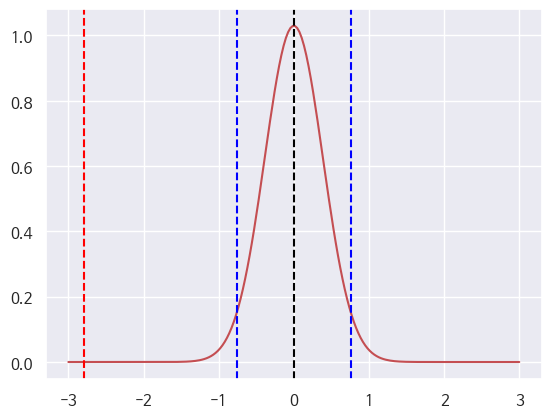

In [ ]:
from scipy.stats import norm # 정규분포

x_data = np.linspace(-3, 3, 200)

mu = 0 # 평균
se = 2.74/np.sqrt(50) # 표준편차(표준오차)

plt.plot(x_data, norm.pdf(x_data, loc = mu, scale = se), 'r-')
plt.axvline(x = mu, color='black', linestyle='--')
plt.axvline(x = mu + mu1.96 * se, color='blue', linestyle='--')
plt.axvline(x = -1.96 * se, color='blue', linestyle='--')
plt.axvline(x = -2.79, color='red', linestyle='--')
plt.show()